conda install -c conda-forge liac-arff
pip install scipy

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.io import arff

In [52]:
# load the ARFF file
with open('Data\Training_Dataset.arff', 'r') as f:
    data, meta = arff.loadarff(f)

# convert to list of lists
data_list = data.tolist()

# convert to pandas DataFrame
df = pd.DataFrame(data_list)

# add attribute names as columns
df.columns = meta.names()

# iterate over the DataFrame and convert each value to a string
for col in df.columns:
    df[col] = df[col].apply(lambda x: x.decode() if type(x) == bytes else x)

df = df.astype(float)

# save the DataFrame to a new csv file
# df.to_csv('Data/new_file.csv', index=False)

# split the dataframe into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Result', axis=1), df['Result'], test_size=0.25)

# count how many records are there in DataFrame
num_rows = df.shape[0]

# count how many records are there in train DataFrame
num_rows_train = X_train.shape[0]

# count how many records are there in DataFrame
num_rows_test = X_test.shape[0]

print('Train df size is :' , num_rows_train)
print('Test df size is :' , num_rows_test)
print('Whole df size is :' ,num_rows)
print('Test df + Train df size is :' , num_rows_train + num_rows_test)

Train df size is : 8291
Test df size is : 2764
Whole df size is : 11055
Test df + Train df size is : 11055


In [47]:
# liczenie ilości próbek w każdej z klas
class_counts = df['Result'].value_counts()

# obliczenie proporcji próbek w każdej z klas
class_proportions = class_counts / class_counts.sum()

print(class_proportions)

 1.0    0.556943
-1.0    0.443057
Name: Result, dtype: float64


In [48]:
# get a list of all the column names
attributes_test = df.columns.tolist()

# print the list of column names
print(attributes_test)

['having_IP_Address', 'URL_Length', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report', 'Result']


In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8291 entries, 5586 to 6479
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   having_IP_Address            8291 non-null   float64
 1   URL_Length                   8291 non-null   float64
 2   Shortining_Service           8291 non-null   float64
 3   having_At_Symbol             8291 non-null   float64
 4   double_slash_redirecting     8291 non-null   float64
 5   Prefix_Suffix                8291 non-null   float64
 6   having_Sub_Domain            8291 non-null   float64
 7   SSLfinal_State               8291 non-null   float64
 8   Domain_registeration_length  8291 non-null   float64
 9   Favicon                      8291 non-null   float64
 10  port                         8291 non-null   float64
 11  HTTPS_token                  8291 non-null   float64
 12  Request_URL                  8291 non-null   float64
 13  URL_of_Anchor  

In [50]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2764 entries, 2497 to 3388
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   having_IP_Address            2764 non-null   float64
 1   URL_Length                   2764 non-null   float64
 2   Shortining_Service           2764 non-null   float64
 3   having_At_Symbol             2764 non-null   float64
 4   double_slash_redirecting     2764 non-null   float64
 5   Prefix_Suffix                2764 non-null   float64
 6   having_Sub_Domain            2764 non-null   float64
 7   SSLfinal_State               2764 non-null   float64
 8   Domain_registeration_length  2764 non-null   float64
 9   Favicon                      2764 non-null   float64
 10  port                         2764 non-null   float64
 11  HTTPS_token                  2764 non-null   float64
 12  Request_URL                  2764 non-null   float64
 13  URL_of_Anchor  

In [10]:
# # Convert the test data into a format that can be used by the perceptron
# X_test = test_df.values
#
# # Encode the categorical variables in the test data
# encoder = LabelEncoder()
# for i in range(X_train.shape[1]):
#     if type(X_train[0, i]) is str:
#         X_train[:, i] = encoder.fit_transform(X_train[:, i])
#         X_test[:, i] = encoder.transform(X_test[:, i])
#
# # Make predictions on the test data
# y_pred = perceptron.predict(X_test)
#
# correct_predictions = (y_pred == result_test_df).sum()
#
#
# print(correct_predictions , 'out of ',num_rows_test)
# print(correct_predictions / num_rows_test)

1453 out of  2764
0.5256874095513748


In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np


# Tworzenie sieci
model = Sequential()
model.add(Dense(32, input_dim=30, activation='relu')) # warstwa wejściowa, 32 neuronów, 31 wejść
model.add(Dense(16, activation='relu')) # pierwsza warstwa ukryta, 16 neuronów
model.add(Dense(8, activation='relu')) # druga warstwa ukryta, 8 neuronów
model.add(Dense(1, activation='sigmoid')) # warstwa wyjściowa, 1 neuron, funkcja aktywacji sigmoid

optimizer = Adam(learning_rate=0.001)

# Kompilacja sieci
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.fit(X_train,y_train, epochs =50, batch_size=32, validation_data=(X_test,y_test))
test_loss, test_acc = model.evaluate(X_test,y_test)
print('Test accuracy: ', test_acc)

# Tworzenie obiektu PermutationImportance
perm = PermutationImportance(model, random_state=42).fit(X_test, y_test)

# Pobieranie istotności cech
importances = perm.feature_importances_

# sortowanie cech według ich istotności
indices = np.argsort(importances)[::-1]

# tworzenie wykresu
plt.figure(figsize=(20, 8))
plt.title("Istotność cech")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], fontsize=10,rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Epoch 1/50
260/260 [==============================] - 2s 2ms/step - loss: -28.2008 - accuracy: 0.2023 - val_loss: -132.5949 - val_accuracy: 0.2920
Epoch 2/50
260/260 [==============================] - 0s 2ms/step - loss: -946.0925 - accuracy: 0.2748 - val_loss: -2530.3308 - val_accuracy: 0.2894
Epoch 3/50
260/260 [==============================] - 0s 2ms/step - loss: -7460.8296 - accuracy: 0.2738 - val_loss: -14017.3691 - val_accuracy: 0.2822
Epoch 4/50
260/260 [==============================] - 0s 2ms/step - loss: -27900.7969 - accuracy: 0.2729 - val_loss: -43175.2734 - val_accuracy: 0.2739
Epoch 5/50
260/260 [==============================] - 0s 2ms/step - loss: -71995.8047 - accuracy: 0.2692 - val_loss: -99351.9766 - val_accuracy: 0.2836
Epoch 6/50
260/260 [==============================] - 0s 2ms/step - loss: -149418.6562 - accuracy: 0.2714 - val_loss: -193582.5625 - val_accuracy: 0.2804
Epoch 7/50
260/260 [==============================] - 0s 2ms/step - loss: -273704.0625 - accura

In [55]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.feature_selection import SelectFromModel
#
# # Tworzenie modelu drzewa decyzyjnego
# tree_model = DecisionTreeClassifier()
#
# # Uczenie modelu na danych treningowych
# tree_model.fit(X_train, y_train)
#
# # Selekcja cech za pomocą SelectFromModel
# selector = SelectFromModel(tree_model, threshold='mean')
# selector.fit(X_train, y_train)
#
# # Ocena modelu na danych testowych
# # test_acc = tree_model.score(X_test, y_test)
# # print('Test accuracy: ', test_acc)
#
# # Wybieranie cech za pomocą .transform()
# X_train_important = selector.transform(X_train)
# X_test_important = selector.transform(X_test)

Dokładność dla zbioru treningowego: 0.99
Dokładność dla zbioru testowego: 0.96


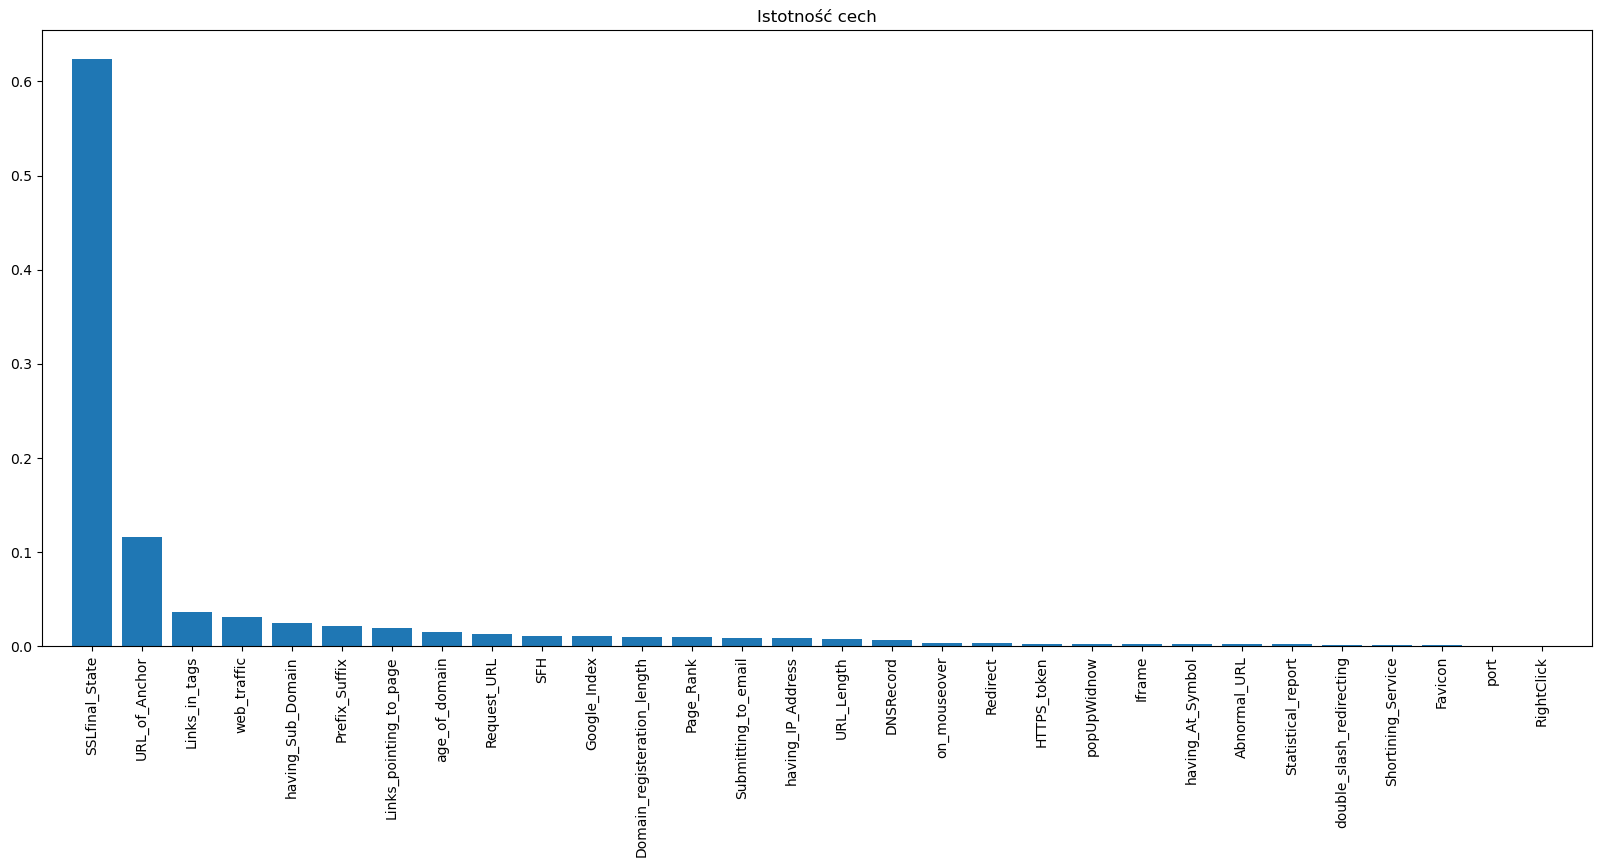

In [76]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Tworzenie i trenowanie modelu drzewa decyzyjnego
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Obliczanie dokładności dla zbioru treningowego
train_acc = accuracy_score(y_train, decision_tree.predict(X_train))
print("Dokładność dla zbioru treningowego: {:.2f}".format(train_acc))

# Obliczanie dokładności dla zbioru testowego
test_acc = accuracy_score(y_test, decision_tree.predict(X_test))
print("Dokładność dla zbioru testowego: {:.2f}".format(test_acc))

# Pobieranie istotności cech
importances = decision_tree.feature_importances_

# sortowanie cech według ich istotności
indices = np.argsort(importances)[::-1]

# tworzenie wykresu
plt.figure(figsize=(20, 8))
plt.title("Istotność cech")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], fontsize=10,rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Dokładność dla zbioru treningowego: 0.99
Dokładność dla zbioru testowego: 0.97


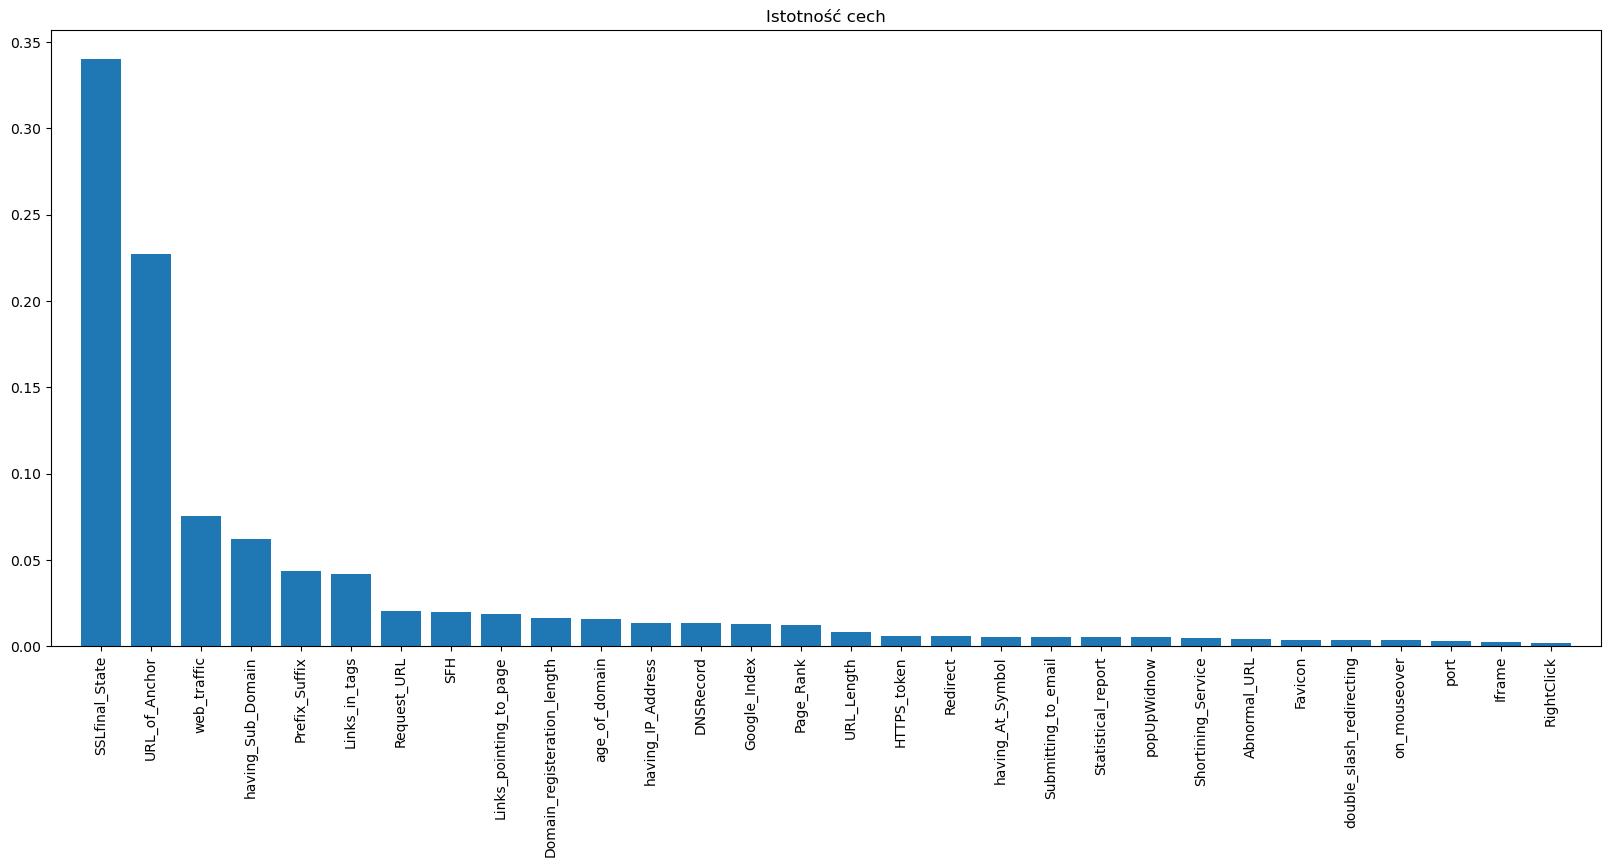

In [77]:

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Tworzenie i trenowanie modelu drzewa decyzyjnego
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Obliczanie dokładności dla zbioru treningowego
train_acc = accuracy_score(y_train, random_forest.predict(X_train))
print("Dokładność dla zbioru treningowego: {:.2f}".format(train_acc))

# Obliczanie dokładności dla zbioru testowego
test_acc = accuracy_score(y_test, random_forest.predict(X_test))
print("Dokładność dla zbioru testowego: {:.2f}".format(test_acc))

# Pobieranie istotności cech
importances = random_forest.feature_importances_

# sortowanie cech według ich istotności
indices = np.argsort(importances)[::-1]

# tworzenie wykresu
plt.figure(figsize=(20, 8))
plt.title("Istotność cech")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], fontsize=10,rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()